# DBSCAN Hyperparameters


Let's explore the hyperparameters for DBSCAN and how they can change results!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [2]:
two_blobs = pd.read_csv('..\data\cluster_two_blobs.csv')
two_blobs_outlier = pd.read_csv('..\data\cluster_two_blobs_outliers.csv')

In [3]:
two_blobs.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


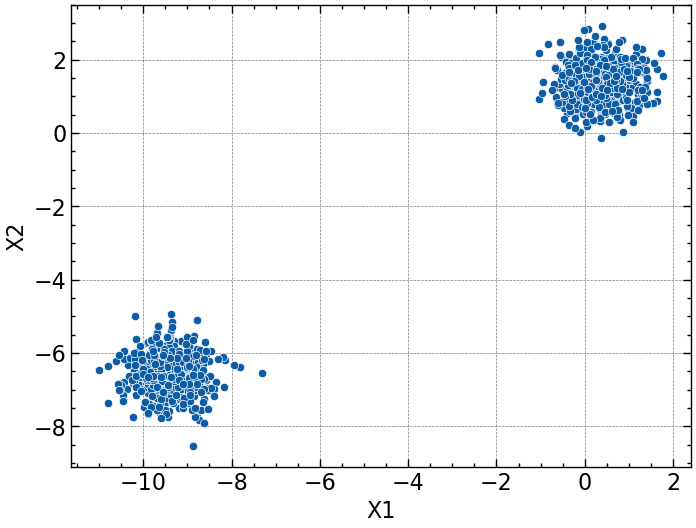

In [4]:
plt.style.use(['science','notebook','grid'])
sns.scatterplot(x='X1', y='X2', data= two_blobs);

### Two blobs outlier

In [5]:
two_blobs_outlier.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


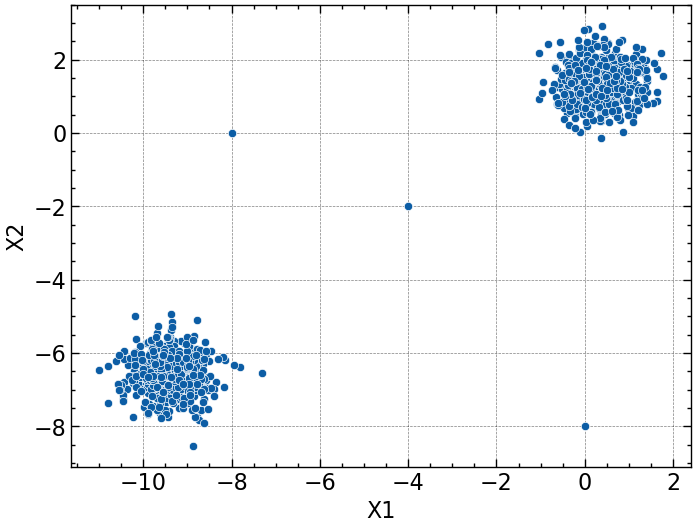

In [6]:
sns.scatterplot(x='X1', y='X2', data= two_blobs_outlier);

## Label Discovery

In [7]:
def display_categories(model, data):
    label = model.fit_predict(data)
    sns.scatterplot(x='X1', y='X2', data= data, palette='Set1', hue=label)

## DBSCAN

In [8]:
from sklearn.cluster import DBSCAN

In [9]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

In [10]:
model = DBSCAN()

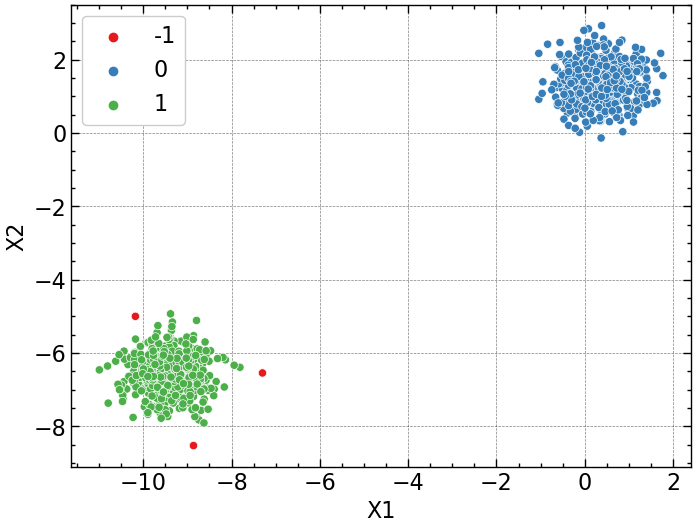

In [11]:
display_categories(model, two_blobs);

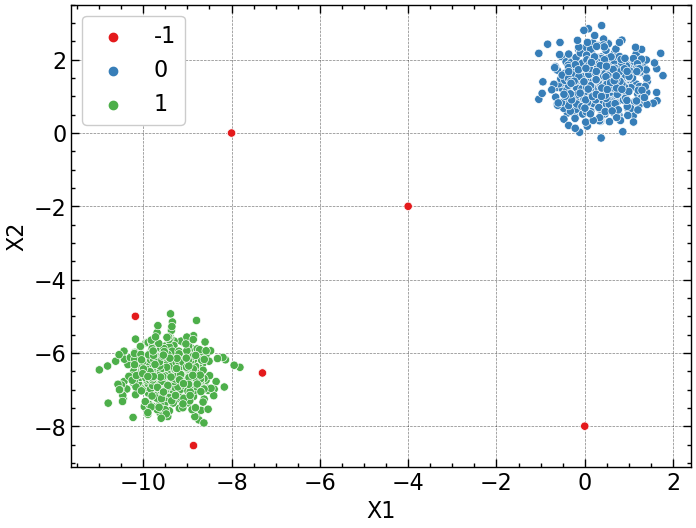

In [12]:
display_categories(model, two_blobs_outlier);

## EPSILON

     eps : float, default=0.5
     |      The maximum distance between two samples for one to be considered
     |      as in the neighborhood of the other. This is not a maximum bound
     |      on the distances of points within a cluster. This is the most
     |      important DBSCAN parameter to choose appropriately for your data set
     |      and distance function.

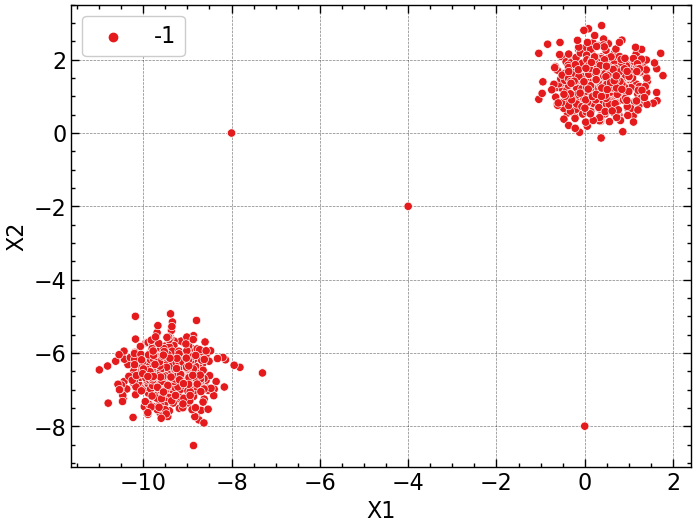

In [13]:
# Tiny Epsilon --> Tiny Max Distance --> Everything is an outlier (class=-1)
model = DBSCAN(eps = 0.001)
display_categories(model,two_blobs_outlier);

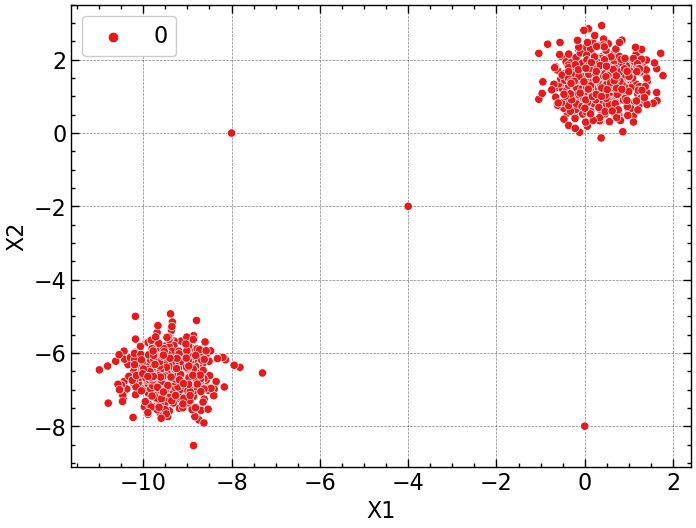

In [14]:
# Huge Epsilon ===> Huge Max Distance ===> Everything in the same cluster (class=0)
# NOTE that Class becomes 0, not -1 (which is for outliers)
model = DBSCAN(eps = 10)
display_categories(model, two_blobs_outlier);

## How find good epsilon

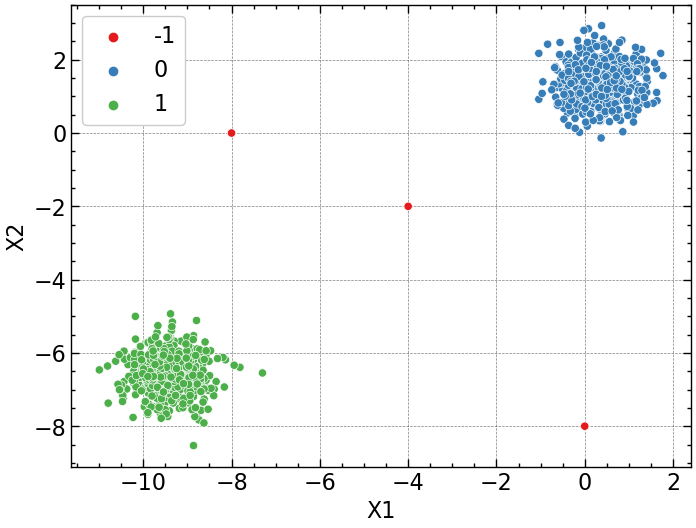

In [15]:
model= DBSCAN(eps=1)
display_categories(model, two_blobs_outlier);

In [16]:
model.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [17]:
model.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

In [18]:
np.sum(model.labels_ == -1) # outlier

3

### Percentage of Outliers

In [19]:
100 * np.sum(model.labels_ == -1) /len(model.labels_)

0.29910269192422734

## Charting reasonable Epsilon values

In [20]:
# bend the knee! https://raghavan.usc.edu/papers/kneedle-simplex11.pdf

In [21]:
# np.arange(start=0.01,stop=10,step=0.01)

In [22]:
outlier_percent = []
number_of_outlier = []

for eps in np.linspace(0.001, 10, 100):
    # create model
    model = DBSCAN(eps= eps)
    model.fit(two_blobs_outlier)
    
    # total number outlier
    number_of_outlier.append(np.sum(model.labels_ == -1))
    
    # percent outlier
    percent_outlier = 100 * np.sum(model.labels_== -1) / len(model.labels_)
    
    outlier_percent.append(percent_outlier)

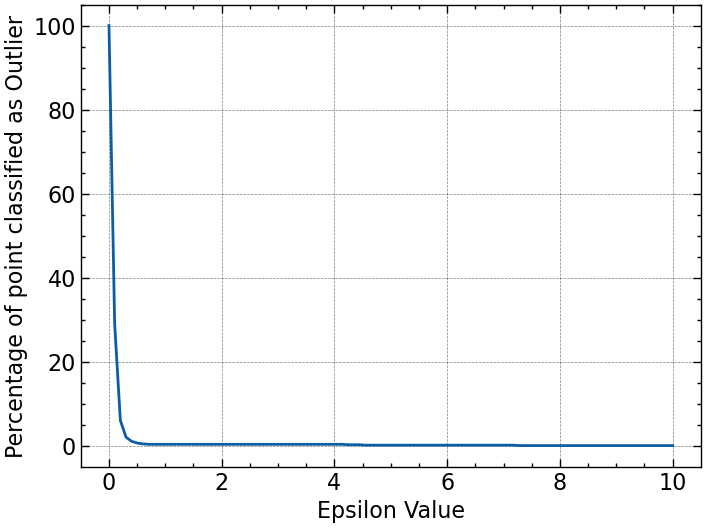

In [23]:
sns.lineplot(x= np.linspace(0.001, 10, 100), y =outlier_percent)
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of point classified as Outlier');

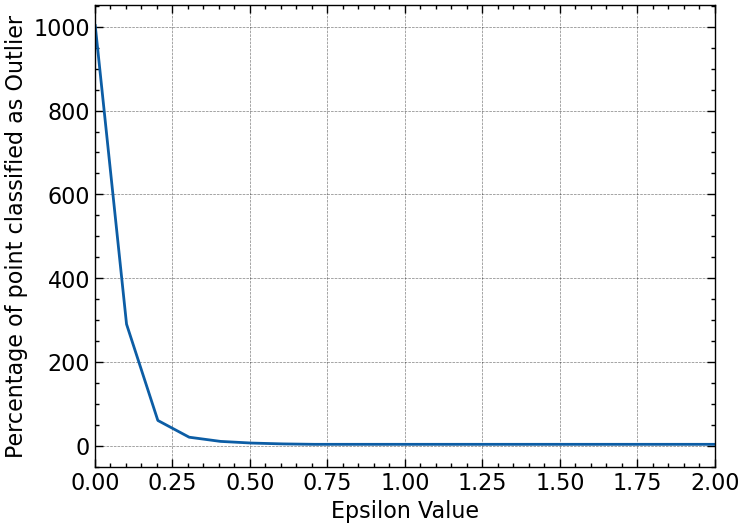

In [24]:
sns.lineplot(x= np.linspace(0.001, 10, 100), y =number_of_outlier)
plt.xlim(0, 2)
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of point classified as Outlier');

## Apakah kita ingin memikirkan penargetan persentase saja?
Jika demikian, Anda dapat "menargetkan" persentase, seperti memilih rentang yang menghasilkan 1%-5% sebagai outlier.

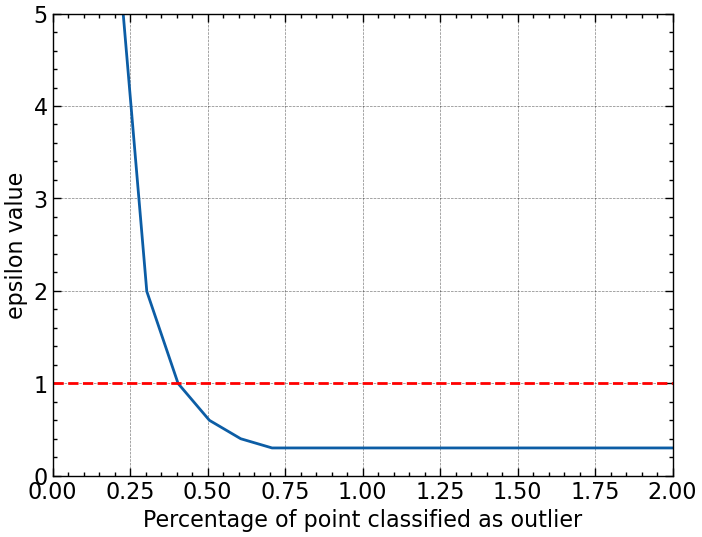

In [25]:
sns.lineplot(x=np.linspace(0.001, 10,100),y= outlier_percent)
plt.xlabel('Percentage of point classified as outlier')
plt.ylabel('epsilon value')

plt.xlim(0,2)
plt.ylim(0,5)
plt.hlines(y=1, xmin= 0, xmax=2, ls='--', colors='red');

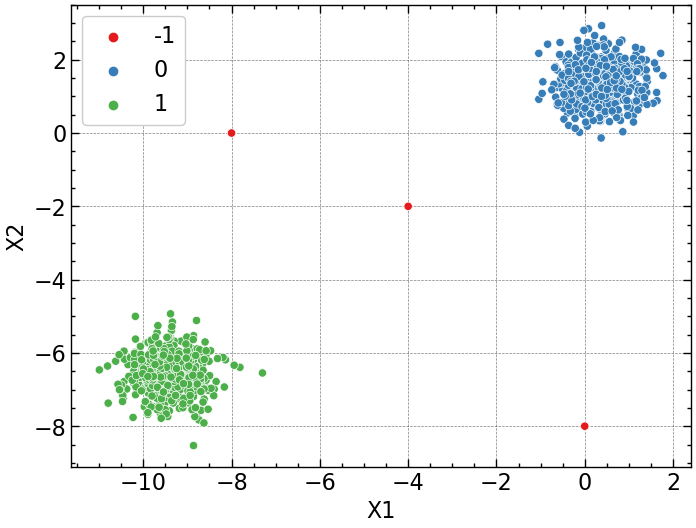

In [26]:
# how to find a good epsilon?
model = DBSCAN(eps= 4)
display_categories(model, two_blobs_outlier);

## Apakah kita ingin memikirkan jumlah penargetan outlier?
Jika demikian, Anda bisa "menargetkan" sejumlah outlier, misalnya 3 poin sebagai outlier.


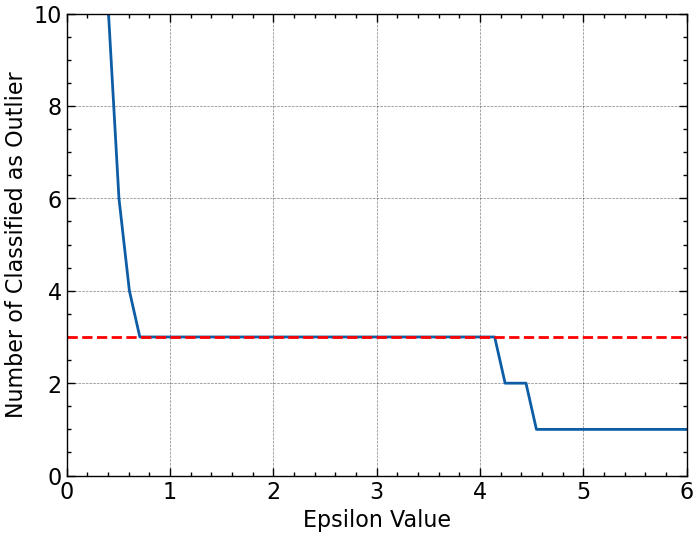

In [27]:
sns.lineplot(x= np.linspace(0.001, 10, 100), y = number_of_outlier)
plt.xlabel('Epsilon Value')
plt.ylabel('Number of Classified as Outlier')

plt.xlim(0,6)
plt.ylim(0, 10)
plt.hlines(y=3, xmin=0, xmax= 10, ls='--', colors='red');

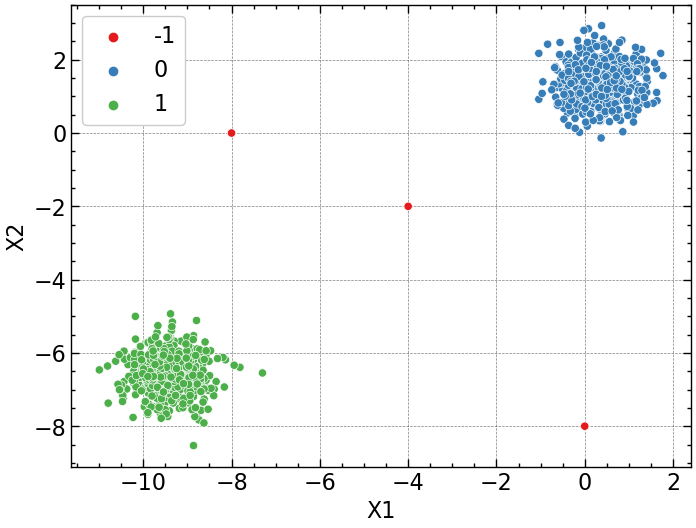

In [28]:
# How to find a good epsilon?
model = DBSCAN(eps= 0.75)
display_categories(model, two_blobs_outlier);

## Minimum Samples

     |  min_samples : int, default=5
     |      The number of samples (or total weight) in a neighborhood for a point
     |      to be considered as a core point. This includes the point itself.
     

How to choose minimum number of points?

https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan

In [29]:
outlier_percent = []

for n in range(1, 100):
    # model 
    model = DBSCAN(min_samples = n)
    model.fit(two_blobs_outlier)
    
    percent_outlier = 100 * np.sum(model.labels_ == -1) / len(model.labels_)
    
    outlier_percent.append(percent_outlier)

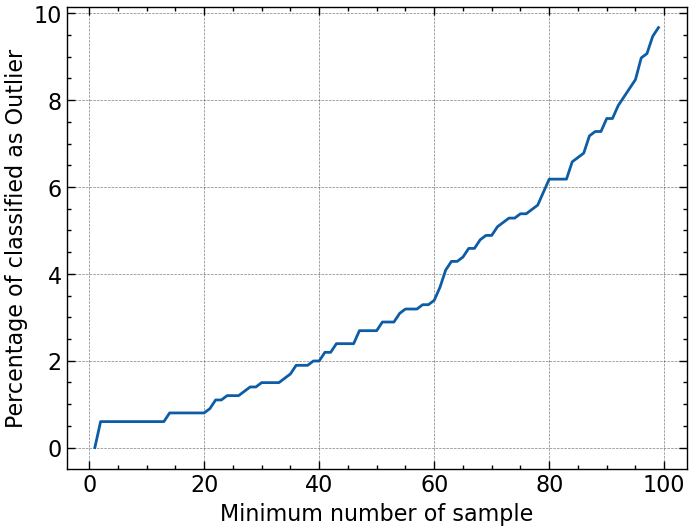

In [30]:
sns.lineplot(x=np.arange(1, 100), y= outlier_percent)
plt.xlabel('Minimum number of sample')
plt.ylabel('Percentage of classified as Outlier');

In [31]:
num_dim = two_blobs_outlier.shape[1]
num_dim

2

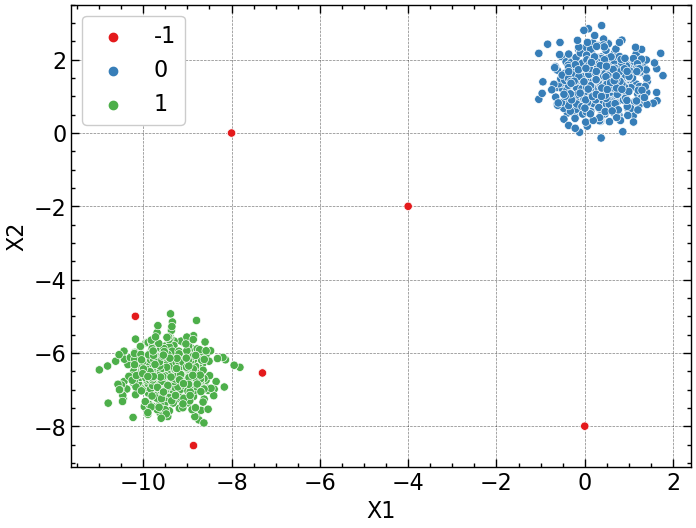

In [34]:
num_dim = two_blobs_outlier.shape[1]

model = DBSCAN(min_samples = 2* num_dim)
display_categories(model, two_blobs_outlier);

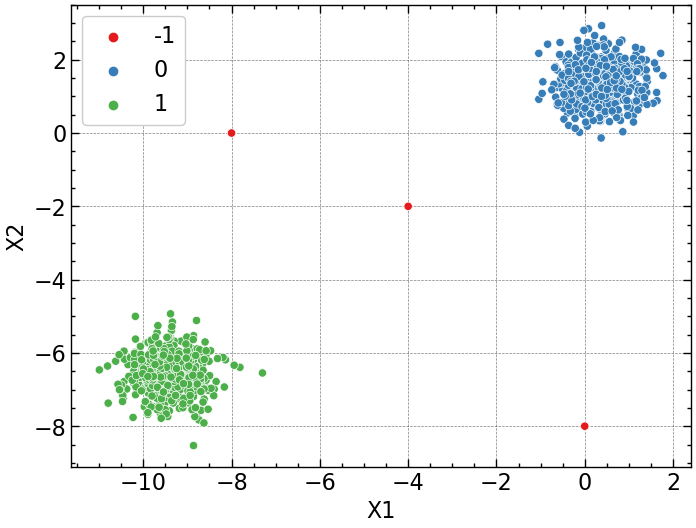

In [35]:
num_dim = two_blobs_outlier.shape[1]

model = DBSCAN(eps= 0.75, min_samples = 2* num_dim)
display_categories(model, two_blobs_outlier);

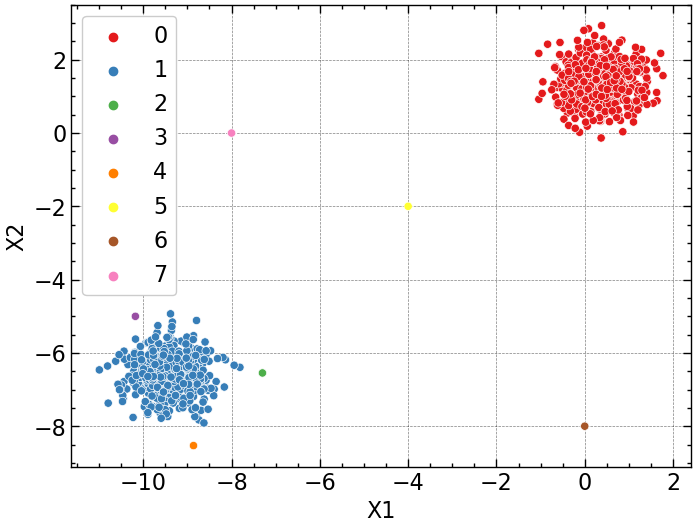

In [37]:
model = DBSCAN(min_samples = 1)
display_categories(model, two_blobs_outlier);

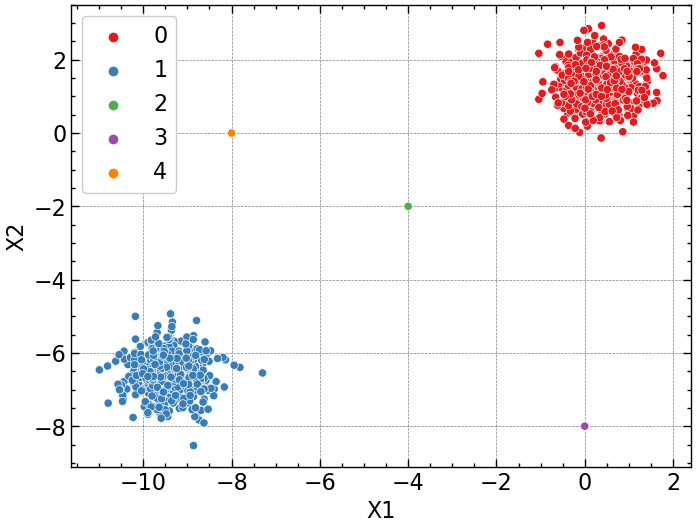

In [39]:
model = DBSCAN(eps = 0.75, min_samples= 1)
display_categories(model, two_blobs_outlier);